# Title of the figure (fig. 1.3)
## Author: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bayes_opt import BayesianOptimization

In [74]:
# Import custom font
import matplotlib.font_manager as fm

path = r'/Users/kimnicoli/Projects/Lecture-Notes/fonts/Hero New Regular.otf' # for text only
path = r'/Users/kimnicoli/Projects/Lecture-Notes/fonts/Hero New Medium.otf' # for (a), (b), etc.
custom_font = fm.FontProperties(fname=path)

In [75]:
# Import colors (e.g., as 1D and dictionary)
import pickle

# Use colors as a dictionary
infile = open('/Users/kimnicoli/Projects/Lecture-Notes/colors/colors_dict.pkl','rb')
colors_dict = pickle.load(infile)
infile.close()

# Import 1D array of colors
infile = open('/Users/kimnicoli/Projects/Lecture-Notes/colors/colors_1D.pkl','rb')
colors_1D = pickle.load(infile)
infile.close()


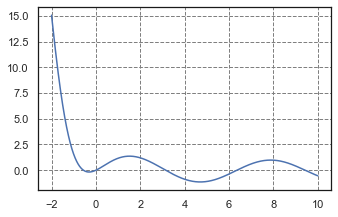

In [76]:
np.random.seed(42)
xs = np.linspace(-2, 10, 10000)

def f(x):
    return np.sin(x) + x**2 * np.cos(x/2) * np.exp(-x)
    #return np.exp(-(x - 2) ** 2) + np.exp(-(x - 6) ** 2 / 10) + 1/ (x ** 2 + 1)

plt.plot(xs, f(xs))
plt.show()

In [117]:
#utility function for plotting

def plot_bo(f, bo, ax=None, kappa=None):
    sns.set(style="whitegrid", rc={'figure.figsize':(5.25,3.375)}) # in inches
    sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.5", 'axes.edgecolor': '.1'})


    x = np.linspace(-2, 10, 10000)
    mean, sigma = bo._gp.predict(x.reshape(-1, 1), return_std=True)
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(x, f(x), color=colors_dict["blue"]["medium"], linewidth=3, linestyle='dashed', label='True function')
    ax.plot(x, mean, color=colors_dict["orange"]["medium"], linewidth=3, label='GP')
    ax.fill_between(x, mean + sigma, mean - sigma, color=colors_dict["orange"]["medium"],label='GP Confidence', alpha=0.3)
    ax.scatter(bo.space.params.flatten(), bo.space.target,label='Sampled points', color=colors_dict["purple"]["dark"], s=50, zorder=10)
    ax.set_xlabel(r'$x$', fontproperties=custom_font, fontsize=35)
    ax.grid()
    plt.setp(ax.get_xticklabels(), fontproperties=custom_font, fontsize=25)
    plt.setp(ax.get_yticklabels(), fontproperties=custom_font, fontsize=25)
    
    

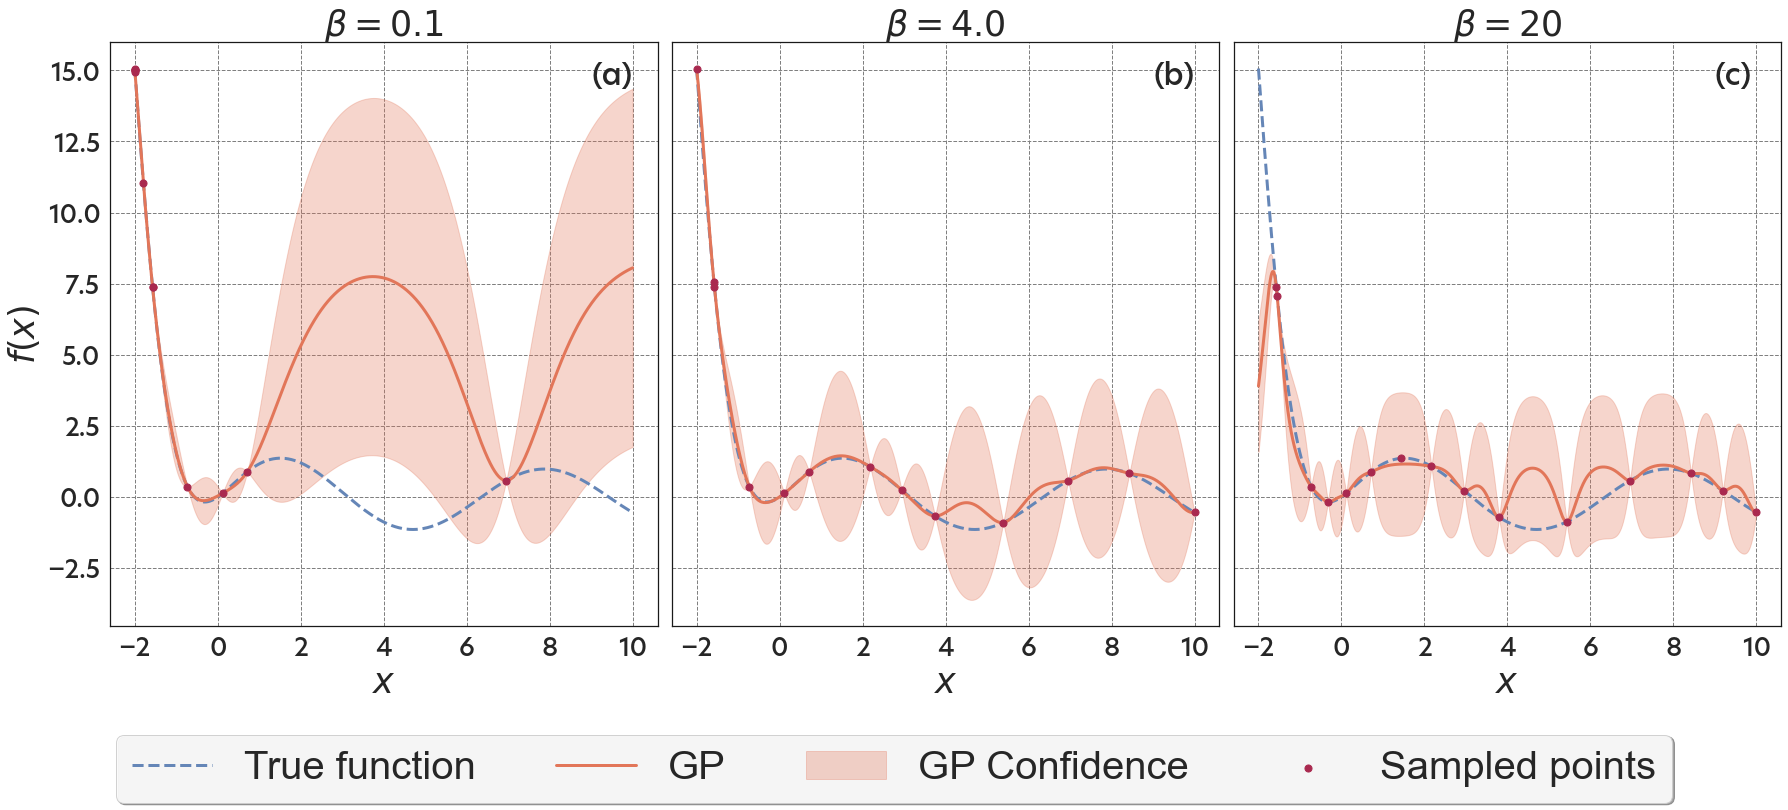

In [118]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10), sharey=True)

bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=0.1)

plot_bo(f, bo, ax=ax1)

bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=4.0)

plot_bo(f, bo, ax=ax2)

bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=20)

plot_bo(f, bo, ax=ax3)

ax1.set_title(r'$\beta=0.1$',fontproperties=custom_font, fontsize=35)
ax2.set_title(r'$\beta=4.0$',fontproperties=custom_font, fontsize=35)
ax3.set_title(r'$\beta=20$',fontproperties=custom_font, fontsize=35)

ax1.set_ylabel(r'$f(x)$', fontproperties=custom_font, fontsize=35)


box = ax3.get_position()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.001),
          fontsize=40, framealpha = 0.9, fancybox=True, shadow=True, ncol=4, )
ax1.text(9., 14.5, "(a)", fontsize=30, fontproperties=custom_font)
ax2.text(9., 14.5, "(b)", fontsize=30, fontproperties=custom_font)
ax3.text(9., 14.5, "(c)", fontsize=30, fontproperties=custom_font)
ax1.grid()
ax2.grid()
ax3.grid()
plt.tight_layout()

plt.show()

fig.savefig('figure4.6.pdf')

In [49]:
colors_dict

{'green': {'dark': (0.22352941, 0.46666667, 0.4549019607843137),
  'medium': (0.29803922, 0.60784314, 0.58431373),
  'light': (0.50980392, 0.76862745, 0.76470588)},
 'purple': {'dark': (0.6627451, 0.16078431, 0.30980392),
  'medium': (0.7372549, 0.39607843, 0.55294118),
  'light': (0.89019608, 0.38823529, 0.52941176)},
 'yellow': {'dark': (0.85882353, 0.58431373, 0.18039216),
  'medium': (0.89803922, 0.68235294, 0.39607843),
  'light': (0.96470588, 0.84705882, 0.52941176)},
 'orange': {'dark': (0.71764706, 0.36470588, 0.24313725),
  'medium': (0.88627451, 0.4627451, 0.34901961),
  'light': (1.0, 0.63921569, 0.44705882)},
 'blue': {'dark': (0.2745098, 0.4, 0.6),
  'medium': (0.39607843, 0.5254902, 0.71764706),
  'light': (0.65098039, 0.79215686, 0.94117647)}}